### importing libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
df = pd.read_csv('warehouse_messy_data.csv')
df

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,ELECTRONICS,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,ELECTRONICS,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,CLOTHING,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,TOYS,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,FURNITURE,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023
...,...,...,...,...,...,...,...,...,...,...
995,1009,widget b,FURNITURE,Warehouse 2,Aisle 2,100,NaN,Supplier C,In Stock,15/01/2023
996,1823,gadget y,ELECTRONICS,Warehouse 2,Aisle 3,300,19.99,Supplier B,In Stock,20/12/2022
997,1797,gadget z,TOYS,Warehouse 3,Aisle 5,150,9.99,Supplier C,Low Stock,05/03/2023
998,1241,widget c,FURNITURE,Warehouse 2,Aisle 2,100,49.99,Supplier C,Low Stock,20/12/2022


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   int64  
 1   Product Name    1000 non-null   object 
 2   Category        1000 non-null   object 
 3   Warehouse       1000 non-null   object 
 4   Location        1000 non-null   object 
 5   Quantity        842 non-null    object 
 6   Price           793 non-null    float64
 7   Supplier        1000 non-null   object 
 8   Status          1000 non-null   object 
 9   Last Restocked  800 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [10]:
df.shape

(1000, 10)

In [11]:
df.isna().sum()

Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity          158
Price             207
Supplier            0
Status              0
Last Restocked    200
dtype: int64

In [12]:
df.describe()

,Product ID,Price
count,1000.000000,793.000000
mean,1503.929000,28.085839
std,289.998108,14.686312
min,1000.000000,9.990000
25%,1242.750000,19.990000
50%,1505.000000,29.990000
75%,1757.250000,49.990000
max,1998.000000,49.990000


### data cleaning process

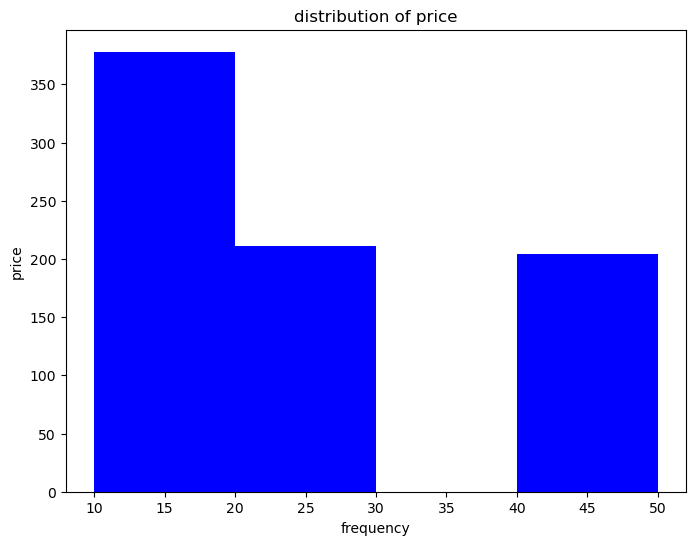

In [14]:
# plotting histogram to check which measure to replace missing values in price
plt.figure(figsize = (8,6))
plt.hist(df['Price'], bins = 4, color ='blue')
plt.title('distribution of price')
plt.xlabel('frequency')
plt.ylabel('price')
plt.show();

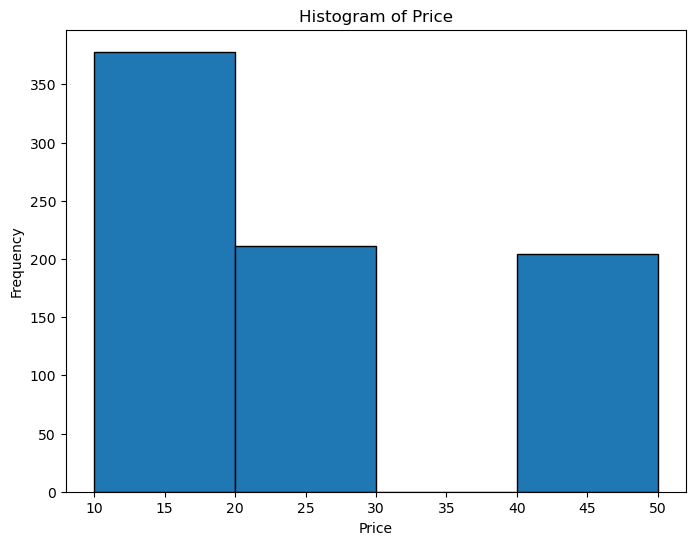

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and an axes
# Plot histogram on the ax
ax.hist(df['Price'], bins=4, edgecolor='black')  # You can adjust 'bins' as needed
ax.set_title('Histogram of Price')  # Set title for the plot
ax.set_xlabel('Price')  # Set x-axis label
ax.set_ylabel('Frequency')  # Set y-axis label
plt.show()


### replacing missing values in price 


In [17]:
#median_price = df['Price'].median()
median_price = df['Price'].median()

In [18]:
#df['Price'].fillna(df['Price'].median,inplace = True)
df['Price'].fillna(median_price, inplace=True)

In [19]:
df.isna().sum()

Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity          158
Price               0
Supplier            0
Status              0
Last Restocked    200
dtype: int64

In [20]:
df.describe()

,Product ID,Price
count,1000.000000,1000.000000
mean,1503.929000,28.480000
std,289.998108,13.099294
min,1000.000000,9.990000
25%,1242.750000,19.990000
50%,1505.000000,29.990000
75%,1757.250000,29.990000
max,1998.000000,49.990000


### changing upper case in category column


In [22]:
df['Category']= df['Category'].str.capitalize()

In [23]:
df.head()

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,Electronics,Warehouse 2,Aisle 1,300,9.99,Supplier C,In Stock,NaN
1,1435,gadget y,Electronics,Warehouse 2,Aisle 4,two hundred,19.99,Supplier C,Out of Stock,NaN
2,1860,widget a,Clothing,Warehouse 2,Aisle 3,100,19.99,Supplier B,In Stock,20/12/2022
3,1270,gadget z,Toys,Warehouse 2,Aisle 4,50,49.99,Supplier B,In Stock,20/12/2022
4,1106,widget a,Furniture,Warehouse 3,Aisle 3,two hundred,9.99,Supplier D,Out of Stock,25/04/2023


### cleaning quantity column


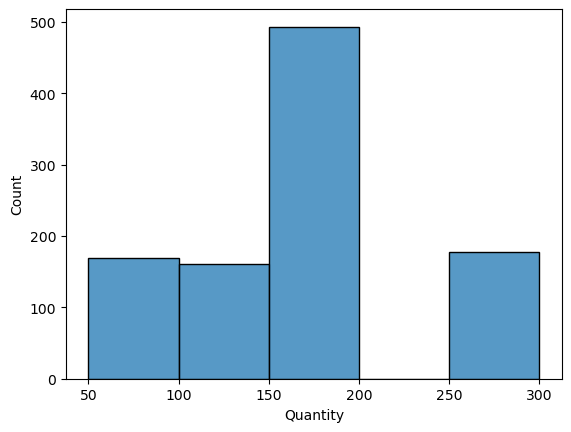

In [25]:
#changing from categorical to numerical
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df['Quantity']= pd.to_numeric(df['Quantity'], errors ='coerce')
df['Quantity'].fillna(df['Quantity'].mean(),inplace = True)
fig, ax = plt.subplots()
sns.histplot(df["Quantity"], bins=5)
plt.show();


In [26]:
df.isna().sum()

Product ID          0
Product Name        0
Category            0
Warehouse           0
Location            0
Quantity            0
Price               0
Supplier            0
Status              0
Last Restocked    200
dtype: int64

In [27]:
#df['Last Restocked ']= pd.to_datetime(df['Last Restocked'], errors ='coerce')
df["Last Restocked"] = pd.to_datetime(df["Last Restocked"], errors = "coerce") 
most_frequent_date = df["Last Restocked"].mode()[0]
df["Last Restocked"].fillna(most_frequent_date, inplace = True)
df.head(2)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,gadget y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,gadget y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20


In [28]:
df['Product Name']= df['Product Name'].str.title()
df.head(2)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20


In [29]:
for column in df.select_dtypes(include=["object"]).columns:
    df[column] = df[column].str.strip()


In [30]:
df

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20
2,1860,Widget A,Clothing,Warehouse 2,Aisle 3,100.000000,19.99,Supplier B,In Stock,2022-12-20
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.000000,49.99,Supplier B,In Stock,2022-12-20
4,1106,Widget A,Furniture,Warehouse 3,Aisle 3,152.346041,9.99,Supplier D,Out of Stock,2023-04-25
...,...,...,...,...,...,...,...,...,...,...
995,1009,Widget B,Furniture,Warehouse 2,Aisle 2,100.000000,29.99,Supplier C,In Stock,2023-01-15
996,1823,Gadget Y,Electronics,Warehouse 2,Aisle 3,300.000000,19.99,Supplier B,In Stock,2022-12-20
997,1797,Gadget Z,Toys,Warehouse 3,Aisle 5,150.000000,9.99,Supplier C,Low Stock,2023-03-05
998,1241,Widget C,Furniture,Warehouse 2,Aisle 2,100.000000,49.99,Supplier C,Low Stock,2022-12-20


In [31]:
df.to_csv('cleaned_warehouse_dataset.csv', index=False)

# Exploratory Data Analysis Insights
#### will help to uncover patterns, detect anomalies, and gain insights from the data.

## 1. Distribution of Products across Categories

In [33]:
df_cleaned = pd.read_csv('cleaned_warehouse_dataset.csv')
df_cleaned.head(5)

,Product ID,Product Name,Category,Warehouse,Location,Quantity,Price,Supplier,Status,Last Restocked
0,1102,Gadget Y,Electronics,Warehouse 2,Aisle 1,300.000000,9.99,Supplier C,In Stock,2022-12-20
1,1435,Gadget Y,Electronics,Warehouse 2,Aisle 4,152.346041,19.99,Supplier C,Out of Stock,2022-12-20
2,1860,Widget A,Clothing,Warehouse 2,Aisle 3,100.000000,19.99,Supplier B,In Stock,2022-12-20
3,1270,Gadget Z,Toys,Warehouse 2,Aisle 4,50.000000,49.99,Supplier B,In Stock,2022-12-20
4,1106,Widget A,Furniture,Warehouse 3,Aisle 3,152.346041,9.99,Supplier D,Out of Stock,2023-04-25


In [34]:
counts = df_cleaned['Category'].value_counts()

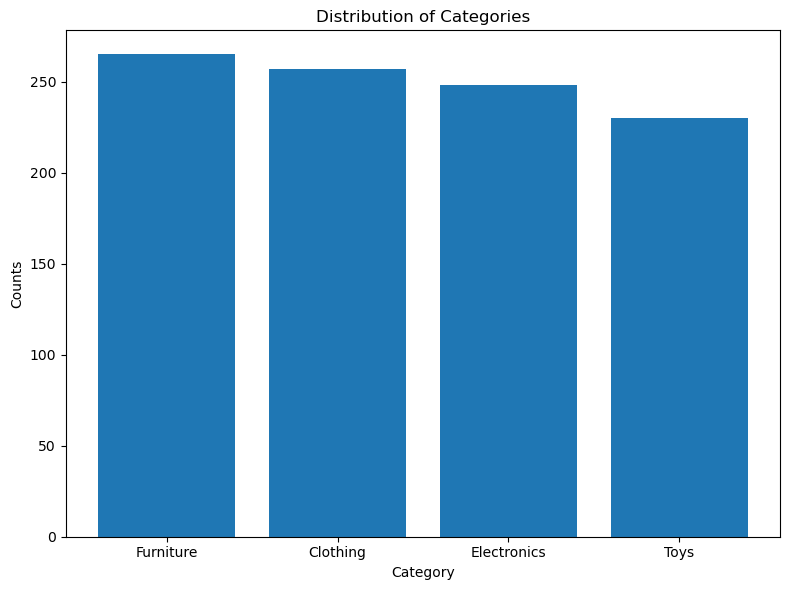

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(counts.index, counts.values)
ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show();

In [36]:
"""
Insight from the distribution of category
The furniture category seems to have the heaviest stock, while Toys are the fewest.
The variations across the categories seem to be a slight one.
"""

'\nInsight from the distribution of category\nThe furniture category seems to have the heaviest stock, while Toys are the fewest.\nThe variations across the categories seem to be a slight one.\n'

### 2. Price distribution

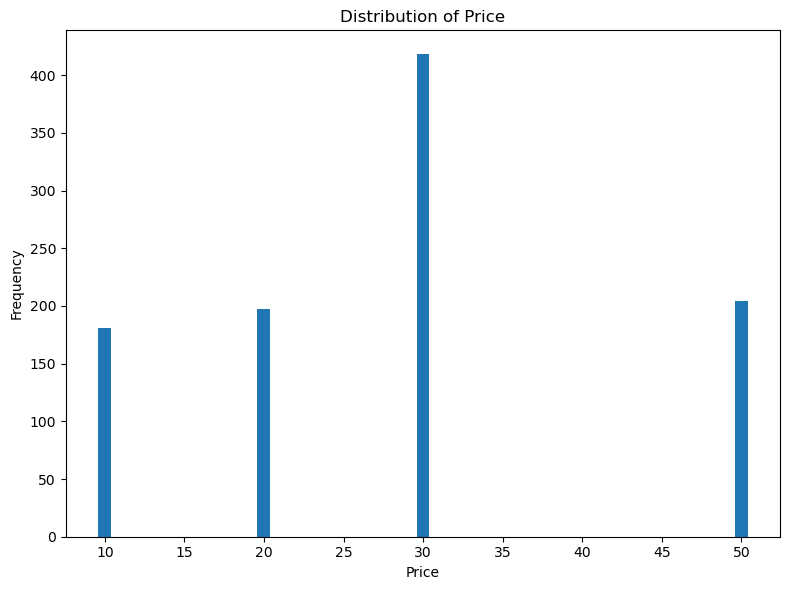

In [38]:
frequency = df_cleaned['Price'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(frequency.index, frequency.values)
ax.set_title('Distribution of Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show();

In [39]:
"""
Insights
The prices of products are distributed within a specific range,
primarily clustering around the average price of $28 as can be observed below.
This suggests a standard pricing strategy with few high-priced items.
"""

'\nInsights\nThe prices of products are distributed within a specific range,\nprimarily clustering around the average price of $28 as can be observed below.\nThis suggests a standard pricing strategy with few high-priced items.\n'

### 3. Stock status Distribution

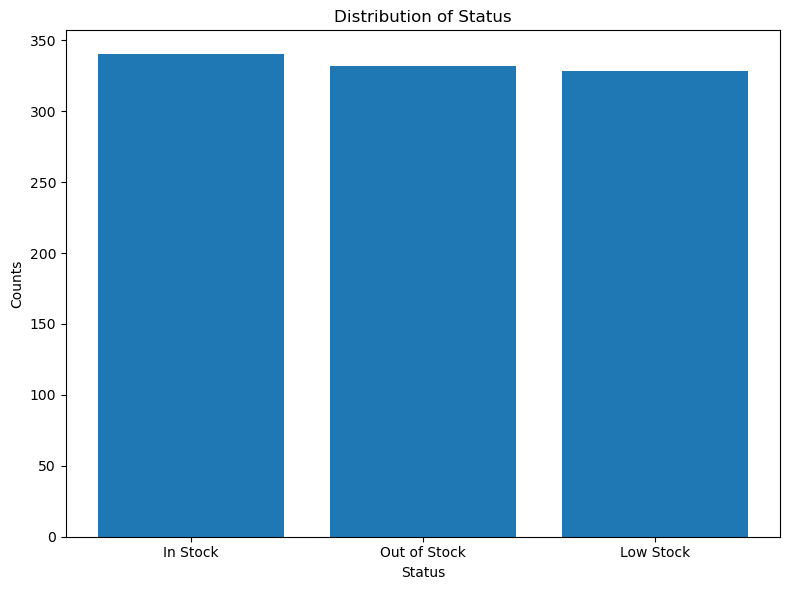

In [41]:
counts = df_cleaned['Status'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts.values)
ax.set_title('Distribution of Status')
ax.set_xlabel('Status')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show();

In [42]:
""""
Insights
A slight majority of products seem to be in stock, 
but a significant portion is out of stock, 
which could indicate supply chain issues or high demand.
"""

'"\nInsights\nA slight majority of products seem to be in stock, \nbut a significant portion is out of stock, \nwhich could indicate supply chain issues or high demand.\n'

### 4. Relationship btwn Quantity and price

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


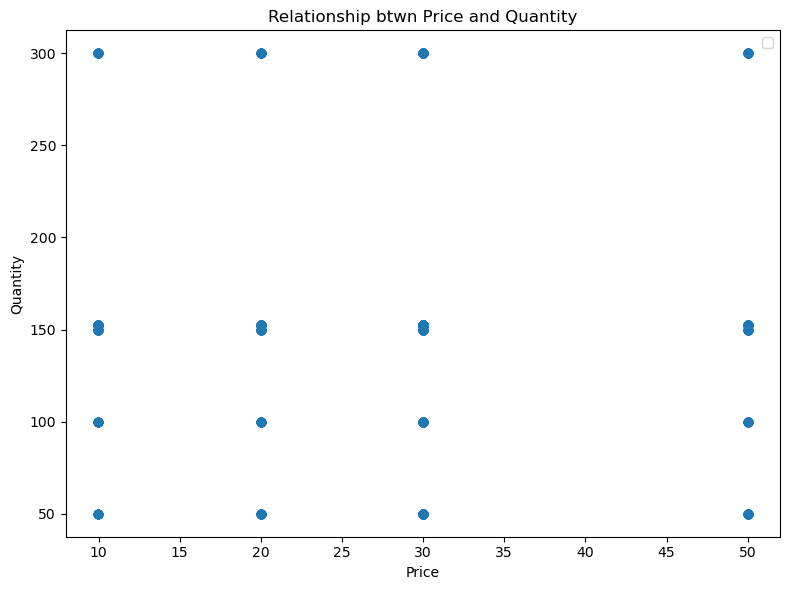

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df_cleaned['Price'], df_cleaned['Quantity'])
ax.set_title('Relationship btwn Price and Quantity')
ax.set_xlabel('Price')
ax.set_ylabel('Quantity')
ax.legend()
plt.tight_layout()
plt.show();

In [45]:
"""
There seems to be no clear relationship between price and quantity as seen below,
indicating that the stocking strategy might not be directly influenced by price 
but rather by other factors such as demand or supplier constraints.
"""

'\nThere seems to be no clear relationship between price and quantity as seen below,\nindicating that the stocking strategy might not be directly influenced by price \nbut rather by other factors such as demand or supplier constraints.\n'

### 5. Frequency of Restocking Events by Supplier:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


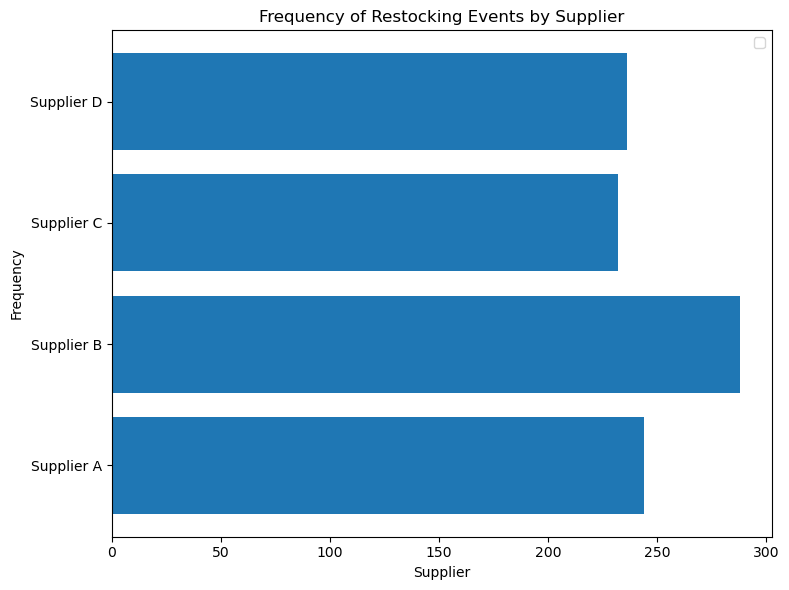

In [47]:
restock_frequency = df_cleaned.groupby('Supplier')['Last Restocked'].count()
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(restock_frequency.index, restock_frequency.values)
ax.set_title('Frequency of Restocking Events by Supplier')
ax.set_xlabel('Supplier')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show();

In [48]:
"""
The frequency of restocking varies by supplier, but Supplier B seems to have supplied more the others.
All the suppliers seem to be having multiple restocking events which suggests a more frequent supply chain connection 
or higher demand for their products.
"""

'\nThe frequency of restocking varies by supplier, but Supplier B seems to have supplied more the others.\nAll the suppliers seem to be having multiple restocking events which suggests a more frequent supply chain connection \nor higher demand for their products.\n'

# Detailed analysis of the warehouse data

## A. Stock Analysis



### 1. Average Quantity per Product Category

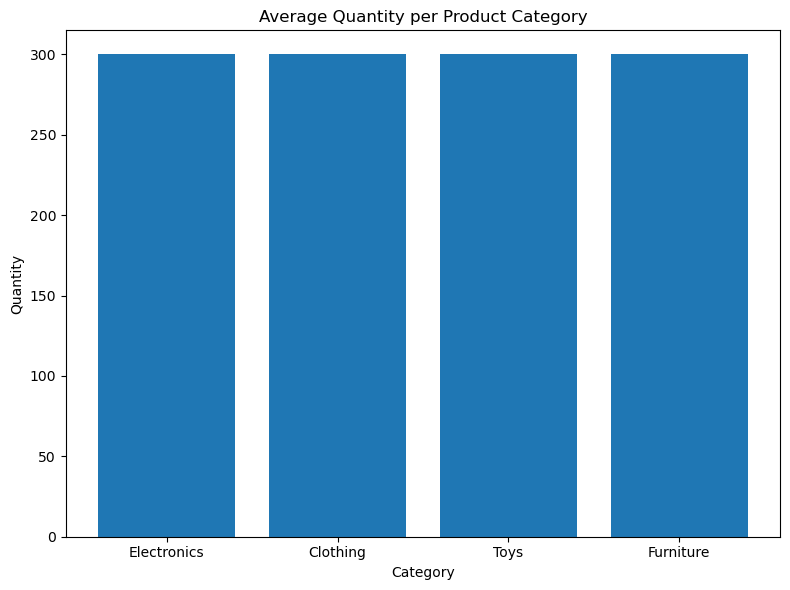

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(df_cleaned['Category'], df_cleaned['Quantity'])
ax.set_title('Average Quantity per Product Category')
ax.set_xlabel('Category')
ax.set_ylabel('Quantity')
plt.tight_layout()
plt.show();

In [52]:
'''
The average quantity per category varies only slightly. 
The Furniture category has the lowest average quantities, potentially indicating 
less demand or higher turnover.
'''

'\nThe average quantity per category varies only slightly. \nThe Furniture category has the lowest average quantities, potentially indicating \nless demand or higher turnover.\n'

## Products Frequently Out of Stock:

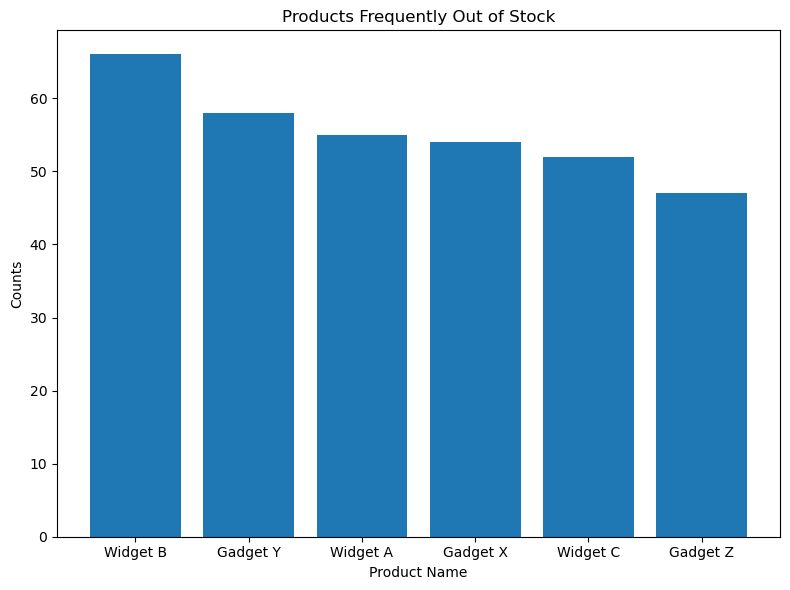

In [54]:
frequently_out_stock = df_cleaned.groupby('Product Name')['Status'].apply(lambda x: (x == 'Out of Stock').sum()).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(frequently_out_stock.index, frequently_out_stock.values)
ax.set_title('Products Frequently Out of Stock')
ax.set_xlabel('Product Name')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()


In [55]:
'''
The analysis shows that certain products (especially Widget B) are more frequently out of stock.
This could indicate high demand, supply chain issues, or insufficient stock management. 
These products may require closer monitoring to avoid stockouts.
'''

'\nThe analysis shows that certain products (especially Widget B) are more frequently out of stock.\nThis could indicate high demand, supply chain issues, or insufficient stock management. \nThese products may require closer monitoring to avoid stockouts.\n'

# 3. Most restocked Products and their suppliers

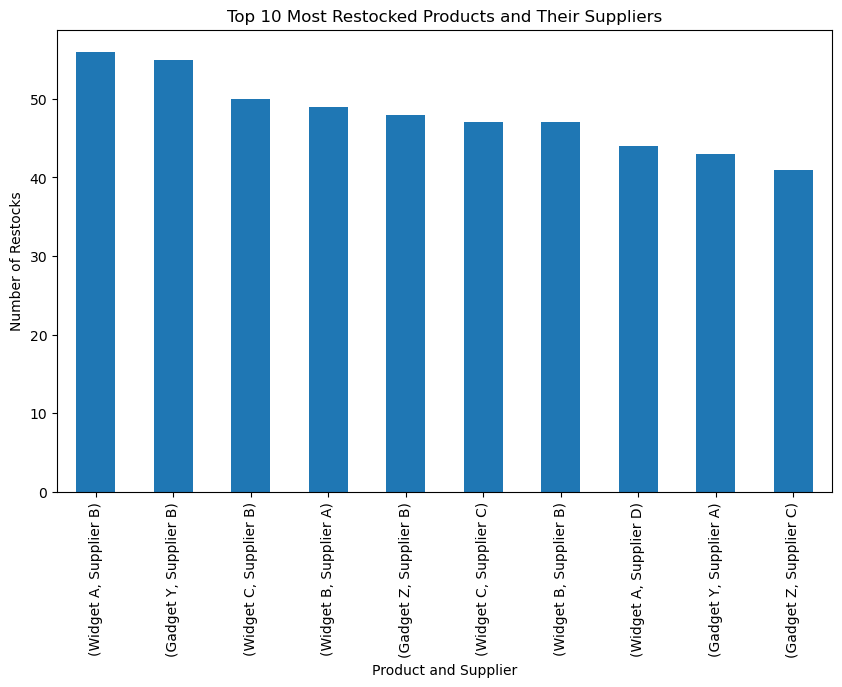

In [57]:
restocked_products = df_cleaned.groupby(['Product Name', 'Supplier']).size().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
restocked_products.head(10).plot(kind='bar')
plt.title('Top 10 Most Restocked Products and Their Suppliers')
plt.xlabel('Product and Supplier')
plt.ylabel('Number of Restocks')
plt.show()

In [58]:
"""
Widget A, Gadget Y and Widget C, all supplied by Supplier B seem to have been restocked most frequently suggesting a strong relationship
between the products and their supplier, potentially due to higher demand or faster turnover.
"""

'\nWidget A, Gadget Y and Widget C, all supplied by Supplier B seem to have been restocked most frequently suggesting a strong relationship\nbetween the products and their supplier, potentially due to higher demand or faster turnover.\n'

# B: Supplier Analysis
Understanding the role of suppliers is vital for optimising stock levels and ensuring a reliable supply chain.

The analysis revealed the number of products provided by each supplier, highlighted suppliers with frequent restocking events, and analysed the dependency on specific suppliers.

These insights are essential for managing supplier relationships and ensuring that stock levels are maintained efficiently.

# 1: Number of Products supplied by Each Supplier

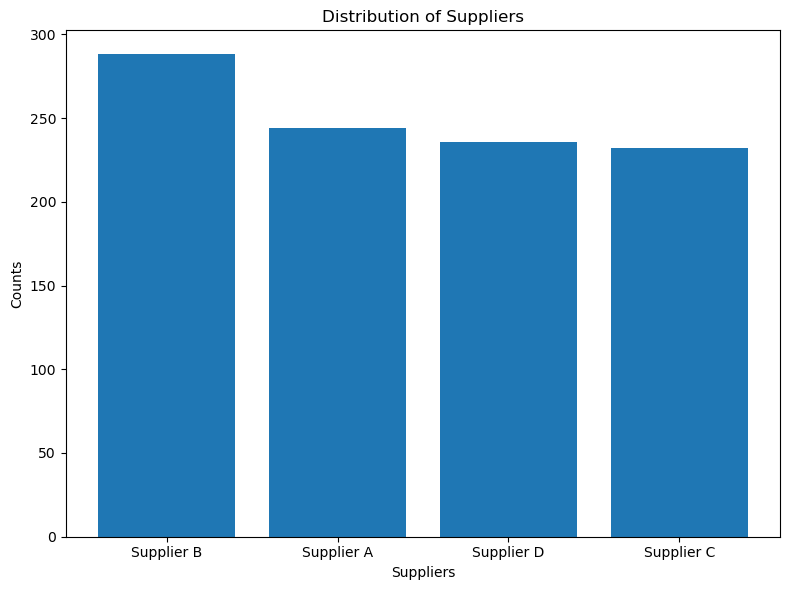

In [61]:
counts = df_cleaned['Supplier'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index, counts.values)
ax.set_title('Distribution of Suppliers')
ax.set_xlabel('Suppliers')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show();

In [62]:
"""
The distribution of products supplied by different suppliers is only slightly uneven, with supplier B providing significantly more products.
This could indicate a reliance on Supplier B, which may impact supply chain resilience.
"""

'\nThe distribution of products supplied by different suppliers is only slightly uneven, with supplier B providing significantly more products.\nThis could indicate a reliance on Supplier B, which may impact supply chain resilience.\n'

# 2: Average Restock Time per Supplier 

In [64]:
df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'], errors='coerce')
df_cleaned['Restock Year'] = df_cleaned['Last Restocked'].dt.year
restock_counts_per_supplier = df_cleaned.groupby(['Supplier', 'Restock Year']).size().unstack(fill_value=0)
restock_counts_per_supplier

Restock Year,2022,2023
Supplier,,
Supplier A,99,145
Supplier B,122,166
Supplier C,102,130
Supplier D,95,141


<Figure size 1000x600 with 0 Axes>

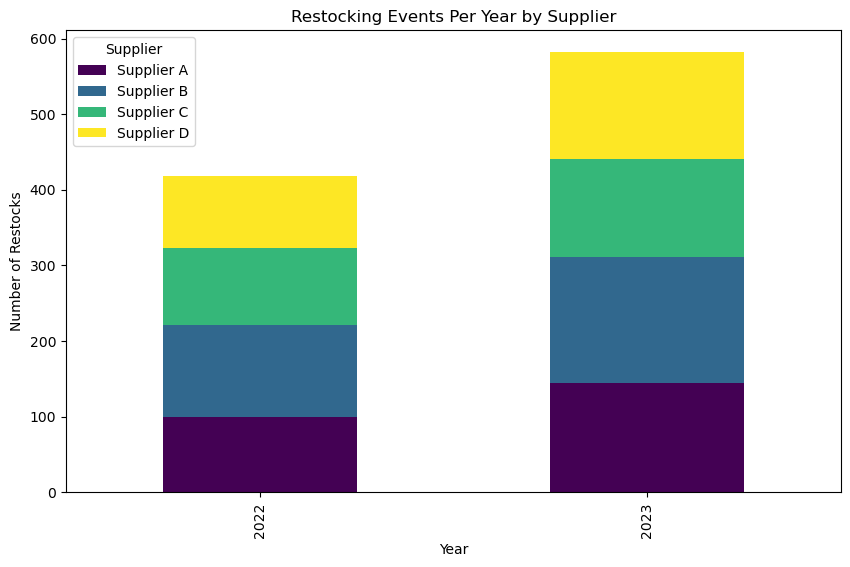

In [65]:
plt.figure(figsize=(10, 6))
restock_counts_per_supplier.T.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Restocking Events Per Year by Supplier')
plt.xlabel('Year')
plt.ylabel('Number of Restocks')
plt.show()

In [66]:
"""
The analysis of restocking events over time by year shows that suppliers consistently restock more frequently 
in the year 2023 with the number of restocks nearing 600 for the same year.
This could be due to higher demand for their products or a more efficient supply chain relationship in 2023.
"""

'\nThe analysis of restocking events over time by year shows that suppliers consistently restock more frequently \nin the year 2023 with the number of restocks nearing 600 for the same year.\nThis could be due to higher demand for their products or a more efficient supply chain relationship in 2023.\n'

# 3. Dependency on Specific Suppliers

Category      Clothing  Electronics   Furniture        Toys
Supplier                                                   
Supplier A  150.023375   156.945026  143.272640  161.632454
Supplier B  145.932513   143.493925  141.563275  157.977697
Supplier C  151.930098   146.206012  149.958389  154.703148
Supplier D  161.933592   162.659675  149.140116  167.508902


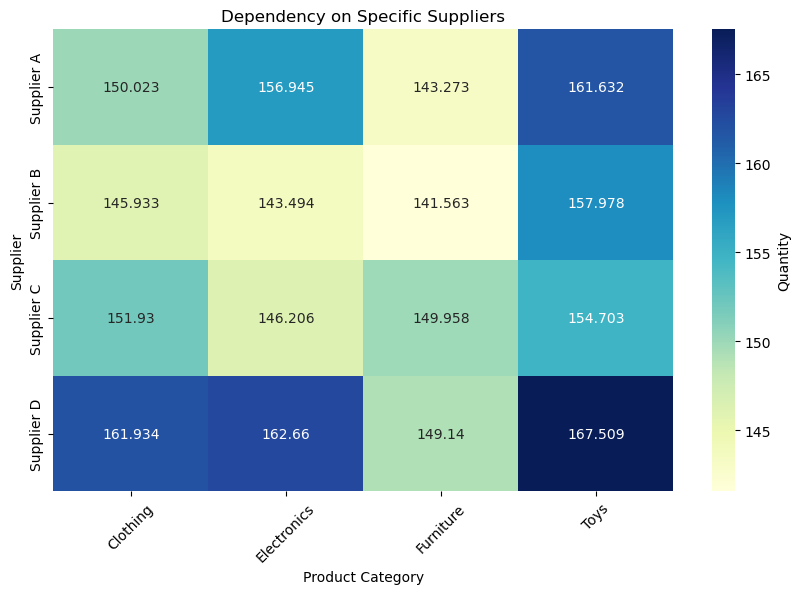

In [68]:
# Pivot the DataFrame to create a matrix format for the heatmap
heatmap_data = df_cleaned.pivot_table(index='Supplier', columns='Category', values='Quantity', fill_value=0)
print(heatmap_data)
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Quantity'})
plt.title('Dependency on Specific Suppliers')
plt.xlabel('Product Category')
plt.ylabel('Supplier')
plt.xticks(rotation=45)
plt.show()


Category     Clothing  Electronics  Furniture       Toys
Supplier                                                
Supplier A  24.518692    25.649914  23.415402  26.415992
Supplier B  24.777689    24.363644  24.035842  26.822825
Supplier C  25.204162    24.254576  24.877069  25.664192
Supplier D  25.253106    25.366336  23.257998  26.122560


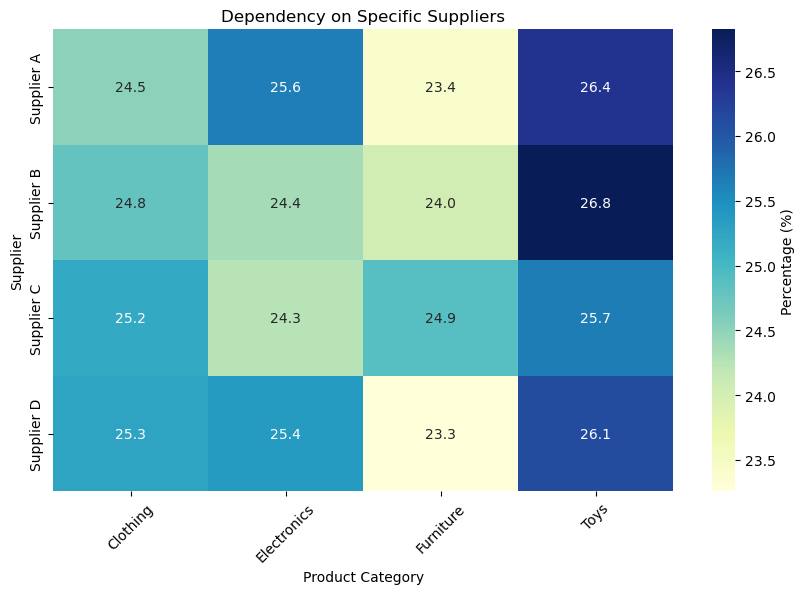

In [69]:

# Pivot the DataFrame to create a matrix format for the heatmap
heatmap_data = df_cleaned.pivot_table(index='Supplier', columns='Category', values='Quantity', fill_value=0)

# Calculate total counts for each supplier
supplier_totals = heatmap_data.sum(axis=1)

# Convert to percentages
percentage_data = heatmap_data.div(supplier_totals, axis=0) * 100
print(percentage_data)
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'})
plt.title('Dependency on Specific Suppliers')
plt.xlabel('Product Category')
plt.ylabel('Supplier')
plt.xticks(rotation=45)
plt.show()


# C: Stock Trend Analysis

The analysis of stock trends over time, broken down by categories, suppliers, and warehouses, provided a comprehensive view of how stock levels fluctuate.

These trends are vital for making informed decisions about inventory management, restocking schedules, and optimising warehouse operations.

By comparing stock trends across different dimensions, businesses can identify patterns and address issues proactively.

## 1. Trends in Stock Levels Over Time

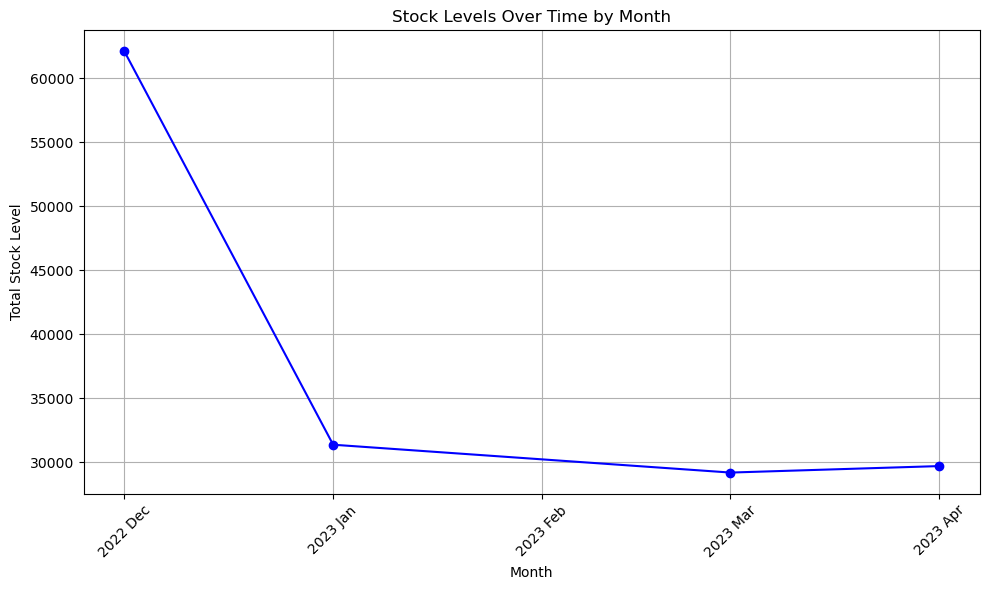

In [132]:
import matplotlib.dates as mdates

df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'])

# Extract Year-Month from Last Restocked
df_cleaned['Year-Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by Year-Month and sum the quantities
monthly_stock_trends = df_cleaned.groupby('Year-Month')['Quantity'].sum().reset_index()

# Convert Year-Month to datetime for plotting
monthly_stock_trends['Year-Month'] = monthly_stock_trends['Year-Month'].dt.to_timestamp()

# Plot the stock level trends by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_stock_trends['Year-Month'], monthly_stock_trends['Quantity'], marker='o', linestyle='-', color='b')

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  # Format to Year Abbreviated Month

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Stock Level')
plt.title('Stock Levels Over Time by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


The line chart illustrates the overall trend in stock levels over time, aggregated by month. Here’s what can be observed:

## Fluctuations in Stock Levels: 
There are visible fluctuations in the stock levels, with January of 2023 being the period that has the highest restocking activity followed by consumption or sales.
## Stock Management Insight: 
Understanding these trends can aid in optimising restocking schedules and ensuring that stock levels are maintained more consistently throughout the year, preventing stockouts or overstock situations.

# 2. Trends in Stocks Levels over time by Category

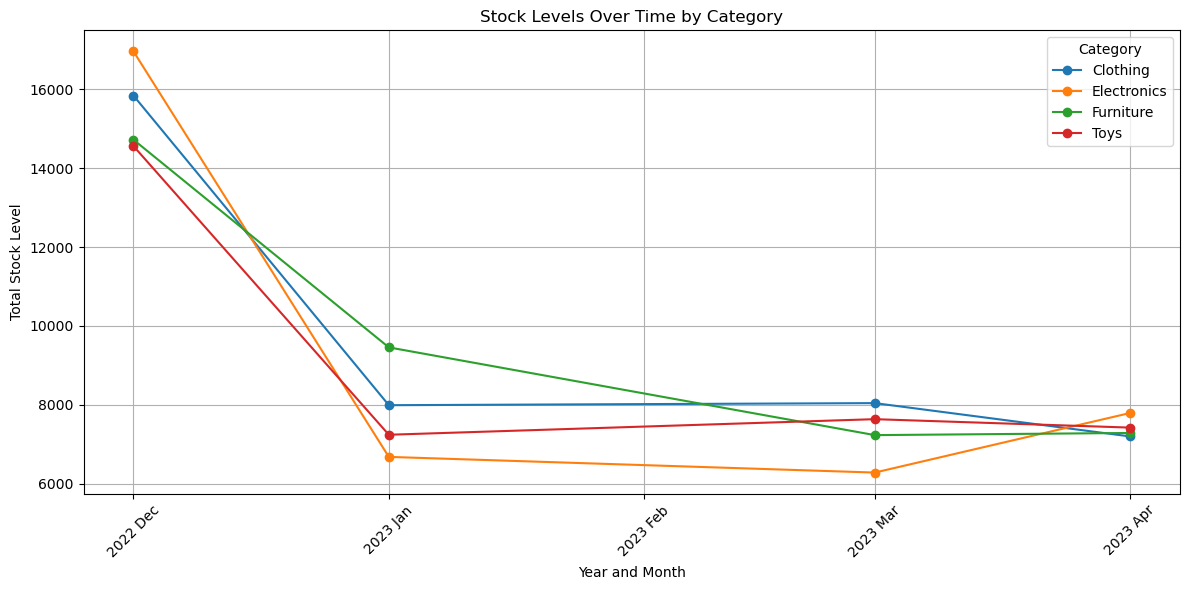

In [128]:
import matplotlib.dates as mdates
df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'])

# Extract Year-Month from Last Restocked
df_cleaned['Year-Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by Year-Month and Category, summing the quantities
category_stock_trends = df_cleaned.groupby(['Year-Month', 'Category'])['Quantity'].sum().reset_index()

# Convert Year-Month to datetime for plotting
category_stock_trends['Year-Month'] = category_stock_trends['Year-Month'].dt.to_timestamp()

# Plotting stock levels by category over time
plt.figure(figsize=(12, 6))

# Plot each category separately
for category in category_stock_trends['Category'].unique():
    category_data = category_stock_trends[category_stock_trends['Category'] == category]
    plt.plot(category_data['Year-Month'], category_data['Quantity'], marker='o', label=category)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  # Format to Year Abbreviated Month

# Adding labels and title
plt.xlabel('Year and Month')
plt.ylabel('Total Stock Level')
plt.title('Stock Levels Over Time by Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Category')
plt.tight_layout()

# Show plot
plt.show()


The line chart shows the stock trends for different categories over time. Key observations include:

## Category-Specific Fluctuations:
Each category has distinct trends, with some showing more stability in stock levels, while others experience significant fluctuations.
## Toys and Clothing:
These categories seem to have more consistent restocking patterns, though they also exhibit noticeable peaks and troughs at certain times.
## Electronics and Furniture:
These categories show more pronounced variability, with distinct peaks and dips possibly reflecting seasonality or varying demand.

# Warehouse Utilization

Warehouse utilisation was analysed by examining stock trends across different warehouses. This analysis provided insights into how each warehouse contributes to overall stock management, highlighting periods of high activity and identifying potential areas for optimisation.

# 1. Trends in Stock Levels Over Times by Warehouse

Warehouse utilisation was analysed by examining stock trends across different warehouses.
This analysis provided insights into how each warehouse contributes to overall stock management,
highlighting periods of high activity and identifying potential areas for optimisation.

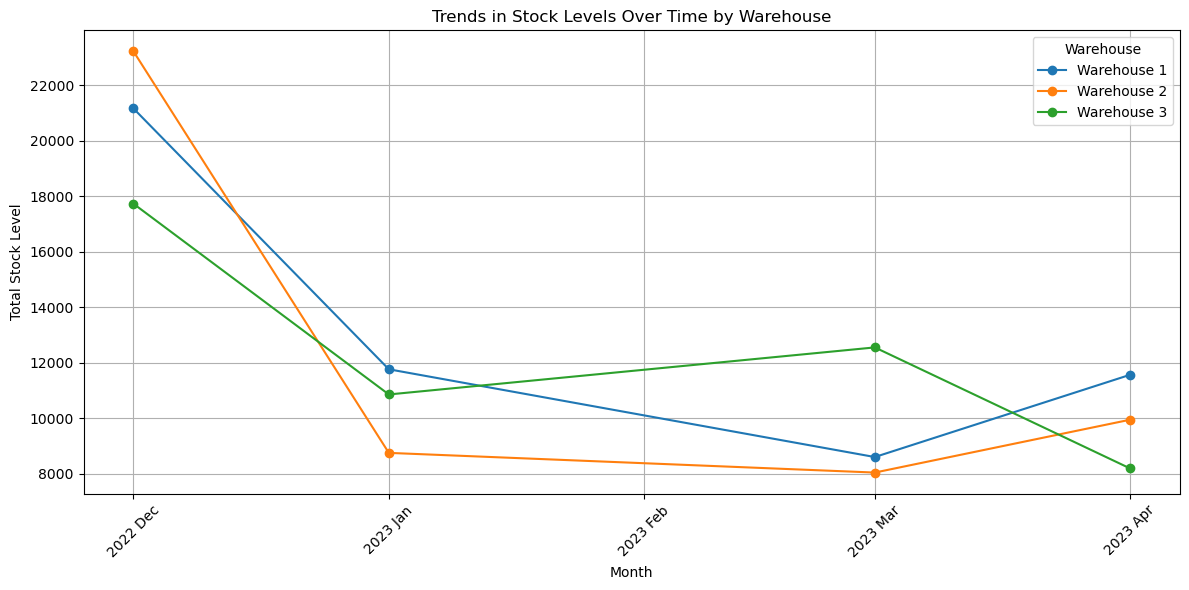

In [139]:
import matplotlib.dates as mdates

df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'])

# Extract Year-Month from Last Restocked
df_cleaned['Year-Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by Year-Month and Warehouse, summing the quantities
warehouse_stock_trends = df_cleaned.groupby(['Year-Month', 'Warehouse'])['Quantity'].sum().reset_index()

# Convert Year-Month to datetime for plotting
warehouse_stock_trends['Year-Month'] = warehouse_stock_trends['Year-Month'].dt.to_timestamp()

# Plotting stock levels by warehouse over time
plt.figure(figsize=(12, 6))

# Plot each warehouse separately
for warehouse in warehouse_stock_trends['Warehouse'].unique():
    warehouse_data = warehouse_stock_trends[warehouse_stock_trends['Warehouse'] == warehouse]
    plt.plot(warehouse_data['Year-Month'], warehouse_data['Quantity'], marker='o', linestyle='-', label=warehouse)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  # Format to Year Abbreviated Month

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Stock Level')
plt.title('Trends in Stock Levels Over Time by Warehouse')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Warehouse')
plt.tight_layout()

# Show plot
plt.show()


The line chart illustrates stock trends across different warehouses over time. 
Here are the key observations:

## Warehouse 2:
Warehouse 2 appears to maintain relatively stable stock levels, though it has experienced fluctuations that might correspond to specific restocking events or high-demand periods.
## Warehouse 1:
This warehouse shows more variability in stock levels, with some noticeable peaks and troughs, indicating periods of increased activity or demand.
## Warehouse 3:
Warehouse 3 seems to have the most dynamic stock levels, with significant fluctuations.
This could suggest that it handles products with higher demand variability or that it serves as a secondary or overflow warehouse.
## Comparison:
The comparison shows that each warehouse has its own unique trend, likely influenced by the types of products stored, the role of the warehouse in the overall logistics network, and possibly regional demand differences.

# Trends in Stock Levels Over Time by Supplier

   Year-Month    Supplier      Quantity
0     2022-12  Supplier A  15503.958944
1     2022-12  Supplier B  16162.609971
2     2022-12  Supplier C  14975.073314
3     2022-12  Supplier D  15456.304985
4     2023-01  Supplier A   6746.920821
5     2023-01  Supplier B   9692.228739
6     2023-01  Supplier C   7796.920821
7     2023-01  Supplier D   7128.152493
8     2023-03  Supplier A   7875.806452
9     2023-03  Supplier B   7292.228739
10    2023-03  Supplier C   6632.844575
11    2023-03  Supplier D   7387.536657
12    2023-04  Supplier A   6985.190616
13    2023-04  Supplier B   9342.228739
14    2023-04  Supplier C   5523.460411
15    2023-04  Supplier D   7844.574780


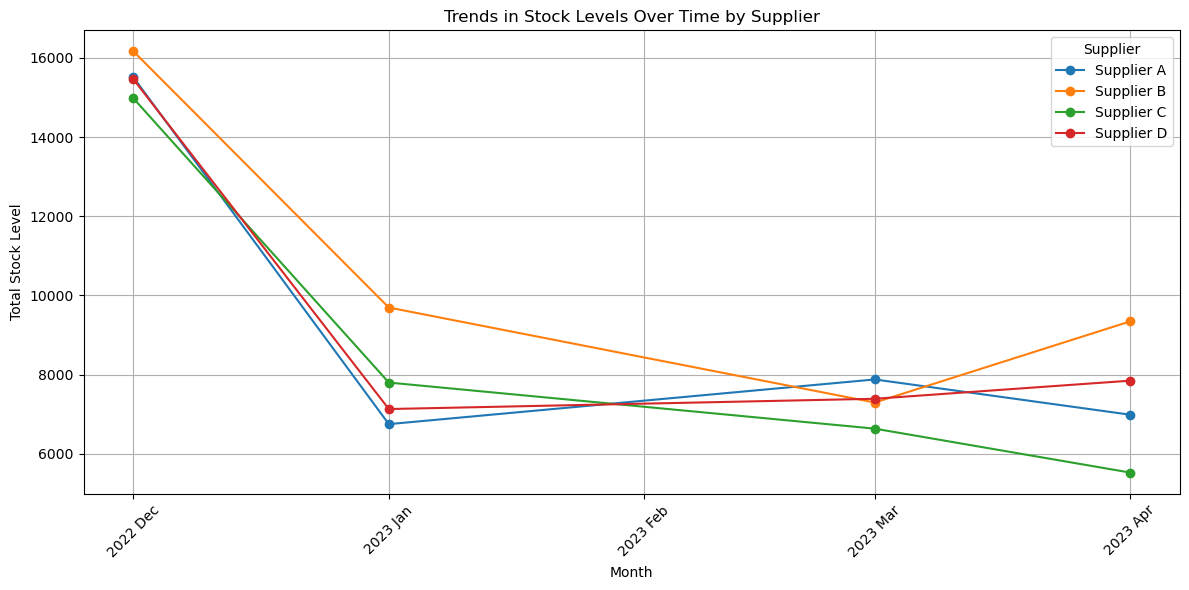

In [146]:
import matplotlib.dates as mdates

# Assuming df_cleaned is already defined and structured as mentioned
# Convert Last Restocked to datetime (if not already done)
df_cleaned['Last Restocked'] = pd.to_datetime(df_cleaned['Last Restocked'])

# Extract Year-Month from Last Restocked
df_cleaned['Year-Month'] = df_cleaned['Last Restocked'].dt.to_period('M')

# Group by Year-Month and Supplier, summing the quantities
supplier_stock_trends = df_cleaned.groupby(['Year-Month', 'Supplier'])['Quantity'].sum().reset_index()
print(supplier_stock_trends)
# Convert Year-Month to datetime for plotting
supplier_stock_trends['Year-Month'] = supplier_stock_trends['Year-Month'].dt.to_timestamp()

# Plotting stock levels by supplier over time
plt.figure(figsize=(12, 6))

# Plot each supplier separately
for supplier in supplier_stock_trends['Supplier'].unique():
    supplier_data = supplier_stock_trends[supplier_stock_trends['Supplier'] == supplier]
    plt.plot(supplier_data['Year-Month'], supplier_data['Quantity'], marker='o', linestyle='-', label=supplier)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))  # Format to Year Abbreviated Month

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Stock Level')
plt.title('Trends in Stock Levels Over Time by Supplier')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Supplier')
plt.tight_layout()

# Show plot
plt.show()


The line chart compares stock trends across different suppliers over time. Here are some insights:

## Distinct Patterns for Each Supplier:
Each supplier exhibits unique stock trends, reflecting differences in their supply schedules, product demand, or the variety of products they provide.
## Supplier A and Supplier D:
These suppliers show relatively consistent stock levels over time, with minor fluctuations. This could indicate steady supply and demand for the products they provide.
## Supplier C:
This supplier shows more significant fluctuations, with periods of high restocking followed by sharp declines. This could be due to high demand for specific products, irregular restocking, or seasonal effects.
## Supplier B:
Supplier B seems to have the most volatile trend, with sharp peaks and valleys, possibly indicating challenges in maintaining consistent stock levels or varying demand for their products.

## Summary of warehouse analysis
The analysis carried out above is by no means exhaustive but does provide a good starting point for further detailed analyses into specific aspects of the warehouse management data.

However, several key takeaways can be derived from the analysis performed so far.

## Key observations
## Category and Product Management: 
Certain categories, such as Electronics and Furniture, maintain more stable stock levels, while others like Clothing and Toys show more volatility.
This suggests that some categories might benefit from more dynamic stock management strategies to prevent stockouts.
## Supplier Dependency: 
The analysis revealed a significant dependency on a few key suppliers.
This concentration poses a risk if these suppliers face supply chain disruptions. Diversifying the supplier base could help mitigate this risk.
## Warehouse Utilisation:
Different warehouses exhibit unique stock level trends, with some showing significant fluctuations.
Understanding these trends allows for better space utilisation and inventory distribution across warehouses.
## Stock Trends: 
The analysis of stock trends over time indicates that certain products and suppliers follow specific restocking patterns.
Recognising these patterns can help in scheduling restocks more effectively and reducing the risk of stockouts.

## Suggestions for Improvement at the Warehouse
## Dynamic Inventory Management:
Implement more dynamic inventory management practices that adjust stock levels based on real-time demand and sales forecasts.
This can help prevent stockouts, especially for high-demand products.
## Supplier Diversification:
Consider diversifying the supplier base to reduce dependency on a few key suppliers.
This will improve supply chain resilience and reduce the risk of disruptions.
## Warehouse Optimisation:
Review warehouse utilisation to optimise space and ensure that high-demand products are easily accessible.
Implementing advanced warehouse management systems (WMS) can aid in better space utilisation and inventory tracking.
## Data-Driven Decision Making:
Utilize the insights gained from stock trends to inform decision-making. Regularly monitor these trends to adjust inventory policies, restocking schedules, and supplier relationships.
## Seasonal Planning:
Given the observed fluctuations in certain categories, implementing seasonal planning can help manage inventory levels more effectively.
Adjust stock levels ahead of peak seasons based on historical data.

## Conclusion
This basic yet detailed analysis of warehouse stock trends offers valuable insights into the dynamics of warehouse management.

By understanding how different factors such as product categories, suppliers, and warehouses impact stock levels, businesses can make more informed decisions, optimise their supply chains, and improve overall efficiency.

Whether it’s managing stockouts, enhancing supplier relationships, or optimising warehouse space, the insights gained from this analysis can lead to more effective and strategic warehouse management.